In [3]:
path = "../AML_Assignment2/cifar/"
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt

def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dicte = pickle.load(f,encoding='bytes')
    images = dicte[b'data']
    Matrix=[]
    image_mean = np.mean(images)
    for i in images:
        ingle_img_reshaped = np.reshape(i,(3, 32,32))
        ingle_img_reshaped = ingle_img_reshaped - image_mean
        ingle_img_reshaped = ingle_img_reshaped/128
#         ingle_img_reshaped = np.transpose(ingle_img_reshaped, (1,2,0))
        #x=np.dot(ingle_img_reshaped[...,:3], [0.299, 0.587, 0.114])
#         x= ingle_img_reshaped.flatten()
        Matrix.append(ingle_img_reshaped)
    #images = np.transpose(images, (1,2,0))
   
    Matrix = np.array(Matrix)
    labels = dicte[b'labels']
    labels = np.array(labels)
    #print labels.shape
    return Matrix, labels
 
#     labels = dict['labels']

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f,encoding='bytes')
    return dict[b'label_names']

def saveCifarImage(array, path, file):
    # array is 3x32x32. cv2 needs 32x32x3
    array = array.asnumpy().transpose(1,2,0)
    # array is RGB. cv2 needs BGR
    array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
    # save to PNG file
    return cv2.imwrite(path+file+".png", array)


Train_data, Train_labels = extractImagesAndLabels(path, "data_batch_1")
Train_data_2, Train_labels_2 = extractImagesAndLabels(path,"data_batch_2")
Train_data_3, Train_labels_3 = extractImagesAndLabels(path, "data_batch_3")
Train_data_3, Train_labels_3 = extractImagesAndLabels(path, "data_batch_3")
Train_data_4, Train_labels_4 = extractImagesAndLabels(path, "data_batch_3")
Train_data_5, Train_labels_5 = extractImagesAndLabels(path, "data_batch_3")
Train_data_t = np.concatenate((Train_data, Train_data_2,Train_data_3,Train_data_4,Train_data_5), axis=0)
Train_labels_t = np.concatenate((Train_labels,Train_labels_2,Train_labels_3,Train_labels_4,Train_labels_5), axis=0)
print (Train_data_t.shape)
Test_data, Test_labels = extractImagesAndLabels(path, "test_batch")

(50000, 3, 32, 32)


In [4]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

In [5]:
def weight_init(m): 
    if isinstance(m, nn.Linear):
        size = m.weight.size()
        fan_out = size[0] # number of rows
        fan_in = size[1] # number of columns
        variance = np.sqrt(2.0/(fan_in + fan_out))
        m.weight.data.normal_(0.0, variance)
        
# def grad_storer(m):
#     if isinstance(m, nn.Conv2d):
#         gradient = m.

class ConvNet(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
    
        self.fc1 = nn.Linear(800, 400)
        self.pre = nn.PReLU()
        self.fc2 = nn.Linear(400, num_classes)
        self.pre2 = nn.PReLU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
#         print(type(out))
#         print(g)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
        out = self.soft(out)
        return out    

In [6]:
class ConvNet2(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU()
                    )
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.fc1 = nn.Linear(2304, 500)
        self.pre = nn.PReLU()
        self.fc2 = nn.Linear(500, num_classes)
        self.pre2 = nn.PReLU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [8]:
class ConvNet3(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet3, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU()
                    )
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.layer5 = nn.Sequential(
                       nn.Conv2d(64,128,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.layer6 = nn.Sequential(
                       nn.Conv2d(128,128,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        
        self.fc1 = nn.Linear(512, 256)
        self.pre = nn.PReLU()
        self.fc2 = nn.Linear(256, num_classes)
        self.pre2 = nn.PReLU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [15]:
criteria  = nn.CrossEntropyLoss()
def train(model_d, device, train_loader, optimizer,epoch, grad_container):
    model_d.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.type(torch.FloatTensor)
        data, target = data.to(device), target.to(device)
        data,target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model_d(data)
        loss = criteria(output, target)
        loss.backward()
#         grad_of_param = {}
        for name, parameter in model_d.named_parameters():
#             grad_of_param[name] = parameter.grad
            gradient_layer1_filter1_channel1 = parameter.grad[0][0][0][2].item()
            grad_container.append(gradient_layer1_filter1_channel1)
            break
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            

def test(model_d, device, test_loader, set_name, contain,acc):
    model_d.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.type(torch.FloatTensor)
            data, target = data.to(device), target.to(device)
            data,target = Variable(data), Variable(target)
            output = model_d(data)
            test_loss += criteria(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    contain.append(test_loss)
    acc.append(correct/len(test_loader.dataset))
    print("Accuracy......")
    print('\n'+set_name+': Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [7]:
# 



import torch.utils.data as data_utils



Train_data_t = torch.from_numpy(Train_data_t)
Train_labels_t = torch.from_numpy(Train_labels_t)
train_data = data_utils.TensorDataset(Train_data_t, Train_labels_t)
train_loader = data_utils.DataLoader(train_data, batch_size=50, shuffle=True)
Test_data =torch.from_numpy(Test_data)
Test_labels= torch.from_numpy(Test_labels)
test_data = data_utils.TensorDataset(Test_data, Test_labels)
test_loader = data_utils.DataLoader(test_data, batch_size=50, shuffle=True)



In [9]:
def model_activate(m):
    learning_rate = 0.01
    loss_train=[]
    acc_train=[]
    loss_test=[]
    acc_test=[]
    ep=[]
    gradient=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(m.parameters(), lr=learning_rate)
    num_epochs=100
    from torch.autograd import Variable
    total_step =len(Train_data_t)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print("Starting............")
    for epoch in range(1,num_epochs+1):
        ep.append(epoch)
        train(m, device, train_loader, optimizer, num_epochs,gradient)
        test(m, device, train_loader, "Training_set",loss_train, acc_train)
        test(m, device, test_loader, "Test_Set",loss_test,acc_test)
    return loss_train,loss_test,acc_test,acc_train,ep,gradient

In [23]:
def loss_plot(ep, loss_train, loss_test, subject):
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(subject)
    plt.plot(ep,loss_train)
    plt.plot(ep,loss_test)
    plt.legend(["Loss-Train", "Loss-Test"], loc='upper right')
    plt.savefig("Figures/"+subject+"_loss_plot.png")

def acc_plot(ep,acc_train,acc_test,subject):
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(subject)
    plt.plot(ep,acc_train)
    plt.plot(ep,acc_test)
    plt.legend(["Acuracy-Train", "Accuracy-Test"], loc='lower right')
#     plt.show()
    plt.savefig("Figures/"+subject+"_acc_plot.png")
    plt.show()
    
def gradient_plot(gradient,name):
    plt.xlabel("Epoch")
    es = [i for i in range(len(gradient))]
    plt.ylabel("Gradient")
    plt.title(name)
    plt.plot(es,gradient)
    # plt.plot(ep,acc_test)
    plt.legend(["Gradient"], loc='upper right')
    plt.savefig("Figures/"+subject+"_grad_plot.png")
    
    
def plot_kernels(tensor, name,num_cols=6):
    print (tensor.shape)
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    print(num_cols,num_rows)
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        p = tensor[i,0]
        p = p.flatten()
        fig = plt.gcf()
        fig.set_size_inches(4, 3)
#         fig.savefig('test2png.png', dpi=10, forward=True)
        plt.hist(p, normed=True, bins=9)
        plt.ylabel("Weights-Dist"+name) 
        plt.savefig("Figures/"+"hist_layer("+name+").png")
        break
    
def model_hist_maker(model_name,subject):
    filters = model_name.modules
    body_model = [i for i in model_name.children()]
#     print(body_model)
    p = len(body_model)-5
    for i in range(p):
        layer1 = body_model[i][0]
        tensor = layer1.weight.data.cpu().numpy()
        plot_kernels(tensor, subject+"_"+str(i))
        




In [41]:
num_classes=10
model_1 = ConvNet(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient_model_1 = model_activate(model_1)
subject = "1Block"

# loss_plot(ep,loss_train,loss_test,subject)
# acc_plot(ep,acc_train,acc_test,subject)
# gradient_plot(gradient,subject)
# loss_plot(ep,loss_train,loss_test,subject)
# acc_plot(ep,acc_train,acc_test,subject)
# gradient_plot(gradient,subject)
# model_hist_maker(model_1,subject)
# torch.save(model_1,"model_1.pth")

Starting............
Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302615


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302378
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.303334
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.302603
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.301867
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302495
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.301198
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.300588
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.302013
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.302246
Accuracy......

Training_set: Average loss: 0.0460, Accuracy: 7552/50000 (15%)

Accuracy......

Test_Set: Average loss: 0.0460, Accuracy: 1540/10000 (15%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.300366
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.301895
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.300667
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.300487
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.299758
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.298484
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.298998
Train Epoch: 100 [3

Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.116029
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.894261
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.107903
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.011173
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.114619
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.006312
Accuracy......

Training_set: Average loss: 0.0403, Accuracy: 22304/50000 (45%)

Accuracy......

Test_Set: Average loss: 0.0406, Accuracy: 4329/10000 (43%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.002704
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.936114
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.026777
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.070106
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.995085
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.941005
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.028289
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.003864
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.023717
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.041591
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.835959
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.839903
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.959096
Accuracy......

Training_set: Average loss: 0.0378, Accuracy: 29003/50000 (58%)

Accuracy......

Test_Set: Average loss: 0.0388, Accuracy: 5229/10000 (52%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.819177
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.928187
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.867157
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.863847
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.975296
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.870788
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.918584
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.829765
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.861129
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.805242
Accuracy......

Training_set: Average loss: 0.0375, Accuracy: 29689/50000 (59%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5288/10000 (53%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0355, Accuracy: 34772/50000 (70%)

Accuracy......

Test_Set: Average loss: 0.0379, Accuracy: 5626/10000 (56%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.767690
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.730291
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.712294
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.751902
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.771105
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.812993
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.761182
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.776437
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.765758
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.808193
Accuracy......

Training_set: Average loss: 0.0352, Accuracy: 35421/50000 (71%)

Accuracy......

Test_Set: Average loss: 0.0378, Accuracy: 5660/10000 (57%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.751076
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.872932
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.663285
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.708001
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.723247
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.713178
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.819953
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.798824
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.661898
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.627041
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.711766
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.667593
Accuracy......

Training_set: Average loss: 0.0341, Accuracy: 37913/50000 (76%)

Accuracy......

Test_Set: Average loss: 0.0377, Accuracy: 5771/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.706896
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.727665
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.607039
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.741602
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.718663
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.591577
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.800182
Train Epoch: 100 [

Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.639401
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.702832
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.700259
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.668103
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.663224
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.621150
Accuracy......

Training_set: Average loss: 0.0336, Accuracy: 39101/50000 (78%)

Accuracy......

Test_Set: Average loss: 0.0376, Accuracy: 5795/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.631405
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.604090
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.741682
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.707765
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.617584
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.703393
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.562664
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.685818
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.675417
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.612823
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.681752
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.702025
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.681152
Accuracy......

Training_set: Average loss: 0.0333, Accuracy: 39632/50000 (79%)

Accuracy......

Test_Set: Average loss: 0.0375, Accuracy: 5837/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.778691
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.677283
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.639799
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.700612
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.717143
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.640493
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.618517
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.580168
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.639283
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.755667
Accuracy......

Training_set: Average loss: 0.0333, Accuracy: 39659/50000 (79%)

Accuracy......

Test_Set: Average loss: 0.0375, Accuracy: 5843/10000 (58%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0333, Accuracy: 39801/50000 (80%)

Accuracy......

Test_Set: Average loss: 0.0376, Accuracy: 5792/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.679296
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.718012
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.679758
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.580714
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.718228
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.618231
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.738446
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.638337
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.579233
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.697738
Accuracy......

Training_set: Average loss: 0.0332, Accuracy: 39852/50000 (80%)

Accuracy......

Test_Set: Average loss: 0.0375, Accuracy: 5817/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.695791
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.598635
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.617559
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.656733
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.659168
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.638082
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.714325
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.579724
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.757184
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.696566
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.579221
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.657354
Accuracy......

Training_set: Average loss: 0.0332, Accuracy: 39970/50000 (80%)

Accuracy......

Test_Set: Average loss: 0.0375, Accuracy: 5816/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.713110
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.716902
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.637288
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.693435
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.637116
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.658973
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.657922
Train Epoch: 100 [

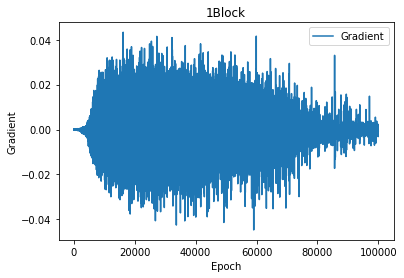

In [42]:
subject = "1Block"
gradient_plot(gradient_model_1,subject)

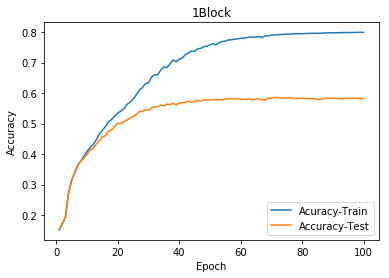

In [43]:
acc_plot(ep,acc_train,acc_test,subject)

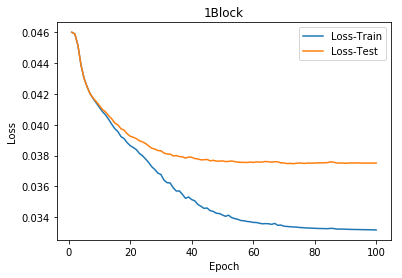

In [44]:
loss_plot(ep,loss_train,loss_test,subject)

(32, 3, 3, 3)
6 6
(32, 32, 3, 3)
6 6


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


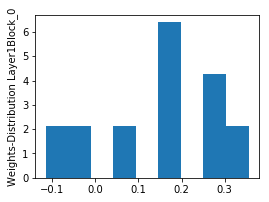

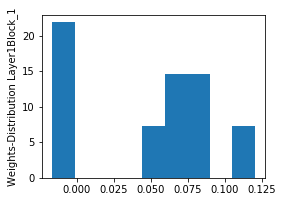

In [45]:
model_hist_maker(model_1,subject)

Starting............
Train Epoch: 100 [0/50000 (0%)]	Loss: 2.303071


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302555
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.302626
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.301953
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.302365
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302792
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.303308
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.302714
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.302726
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.302665
Accuracy......

Training_set: Average loss: 0.0460, Accuracy: 5788/50000 (12%)

Accuracy......

Test_Set: Average loss: 0.0460, Accuracy: 1191/10000 (12%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302451
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302640
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.302316
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.302635
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.302508
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302121
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.302558
Train Epoch: 100 [3

Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.022535
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.111300
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.098063
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.147230
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.067961
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.140276
Accuracy......

Training_set: Average loss: 0.0418, Accuracy: 18236/50000 (36%)

Accuracy......

Test_Set: Average loss: 0.0418, Accuracy: 3640/10000 (36%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.128768
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.128176
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.982039
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.000953
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.118186
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.147369
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.076669
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.098677
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.056077
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.010720
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.990392
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.017526
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.003312
Accuracy......

Training_set: Average loss: 0.0397, Accuracy: 23802/50000 (48%)

Accuracy......

Test_Set: Average loss: 0.0400, Accuracy: 4552/10000 (46%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.949661
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.988524
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.992731
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.964639
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.016351
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.889912
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.996826
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.020988
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.942740
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.952126
Accuracy......

Training_set: Average loss: 0.0394, Accuracy: 24466/50000 (49%)

Accuracy......

Test_Set: Average loss: 0.0398, Accuracy: 4676/10000 (47%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0377, Accuracy: 28808/50000 (58%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5297/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.931024
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.927256
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.885087
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.851607
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.849031
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.797950
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.726896
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.894283
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.935231
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.875928
Accuracy......

Training_set: Average loss: 0.0372, Accuracy: 30305/50000 (61%)

Accuracy......

Test_Set: Average loss: 0.0383, Accuracy: 5449/10000 (54%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.846394
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.883687
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.004625
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.929025
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.775798
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.869259
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.707162
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.754341
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.888808
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.868158
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.773935
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.782316
Accuracy......

Training_set: Average loss: 0.0358, Accuracy: 33609/50000 (67%)

Accuracy......

Test_Set: Average loss: 0.0378, Accuracy: 5677/10000 (57%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.802634
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.840522
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.661072
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.778812
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.779017
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.937443
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.872951
Train Epoch: 100 [

Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.674885
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.869537
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.778610
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.789676
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.676012
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.731469
Accuracy......

Training_set: Average loss: 0.0349, Accuracy: 35810/50000 (72%)

Accuracy......

Test_Set: Average loss: 0.0376, Accuracy: 5784/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.793420
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.814264
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.798368
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.752001
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.724472
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.830196
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.741905
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.687919
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.721447
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.674586
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.648998
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.700020
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.805361
Accuracy......

Training_set: Average loss: 0.0343, Accuracy: 37289/50000 (75%)

Accuracy......

Test_Set: Average loss: 0.0374, Accuracy: 5901/10000 (59%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.682627
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.773355
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.684147
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.741508
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.862147
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.803584
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.723299
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.717166
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.759665
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.713005
Accuracy......

Training_set: Average loss: 0.0341, Accuracy: 37793/50000 (76%)

Accuracy......

Test_Set: Average loss: 0.0374, Accuracy: 5894/10000 (59%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0339, Accuracy: 38222/50000 (76%)

Accuracy......

Test_Set: Average loss: 0.0373, Accuracy: 5923/10000 (59%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.590893
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.703287
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.780385
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.720986
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.685591
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.764931
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.761011
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.689457
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.616298
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.700596
Accuracy......

Training_set: Average loss: 0.0340, Accuracy: 38016/50000 (76%)

Accuracy......

Test_Set: Average loss: 0.0373, Accuracy: 5949/10000 (59%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.648018
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.681279
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.759914
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.759044
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.660676
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.640875
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.735421
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.633202
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.700656
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.681760
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.620447
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.659802
Accuracy......

Training_set: Average loss: 0.0338, Accuracy: 38603/50000 (77%)

Accuracy......

Test_Set: Average loss: 0.0372, Accuracy: 6013/10000 (60%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.620784
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.680925
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.637545
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.599887
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.648214
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.636284
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.623304
Train Epoch: 100 [

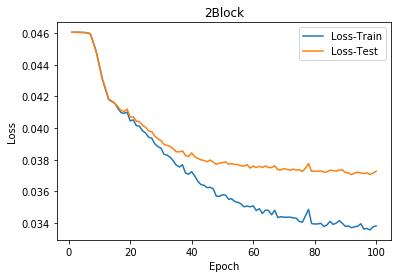

In [46]:
num_classes=10
model_2 = ConvNet2(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2)
subject = "2Block"
loss_plot(ep,loss_train,loss_test,subject)







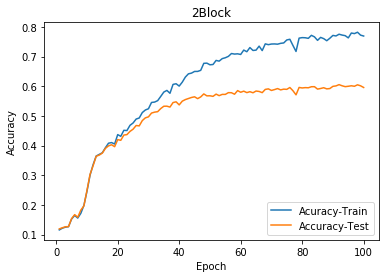

In [49]:
# loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2)
# subject = "2_Block_of_Convolution"
acc_plot(ep,acc_train,acc_test,subject)

In [56]:
torch.save(model_1, "model_1.pth")

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


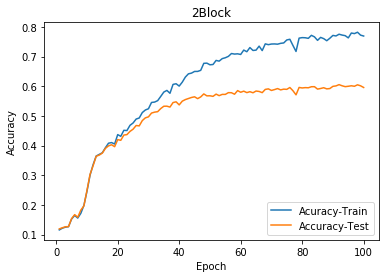

In [50]:
acc_plot(ep,acc_train,acc_test,subject)

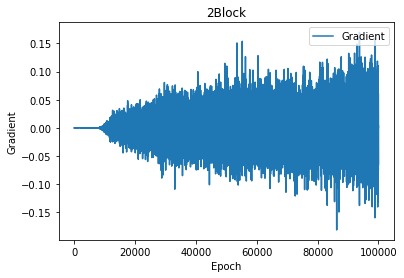

In [51]:
gradient_plot(gradient,subject)

(32, 3, 3, 3)
6 6
(32, 32, 3, 3)
6 6
(64, 32, 3, 3)
6 11
(64, 64, 3, 3)
6 11


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


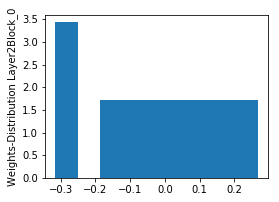

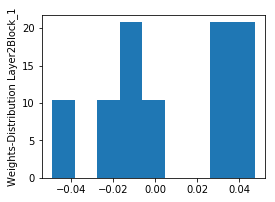

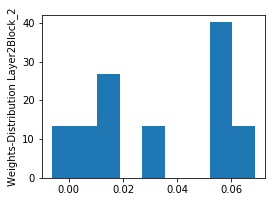

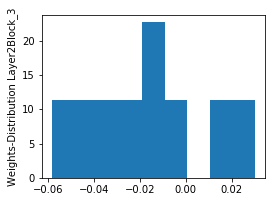

In [57]:
model_hist_maker(model_2,subject)
torch.save(model_2, "model_2.pth")

In [20]:
num_classes=10
model_3 = ConvNet3(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_3)
subject = "3Blocks"
# loss_plot(ep,loss_train,loss_test,subject)


Starting............


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302212
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302402
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.302789
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.302691
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.302630
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302120
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.302660
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.302425
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.302612
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.302477
Accuracy......

Training_set: Average loss: 0.0461, Accuracy: 5107/50000 (10%)

Accuracy......

Test_Set: Average loss: 0.0461, Accuracy: 1000/10000 (10%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302903
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302155
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.302139
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.302187
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.302555
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302122
Train Epoch: 100 [30000/

Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.073036
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.006904
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.029851
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.999683
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.964010
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.966911
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.946739
Accuracy......

Training_set: Average loss: 0.0398, Accuracy: 23218/50000 (46%)

Accuracy......

Test_Set: Average loss: 0.0400, Accuracy: 4571/10000 (46%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.904825
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.038025
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.077303
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.942019
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.033759
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.874818
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.961330
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.977709
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.008943
Train Epoch: 100 

Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.381151
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.361151
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.401151
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.401151
Accuracy......

Training_set: Average loss: 0.0472, Accuracy: 5012/50000 (10%)

Accuracy......

Test_Set: Average loss: 0.0472, Accuracy: 1000/10000 (10%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.401151
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.241151
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.361151
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.341151
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.321151
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.381151
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.301151
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.301151
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.321151
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.361151


KeyboardInterrupt: 

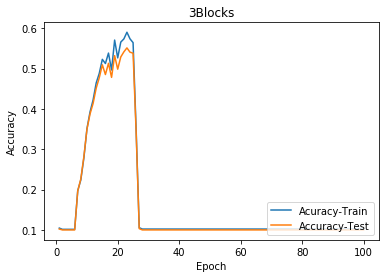

In [17]:
acc_plot(ep,acc_train,acc_test,subject)

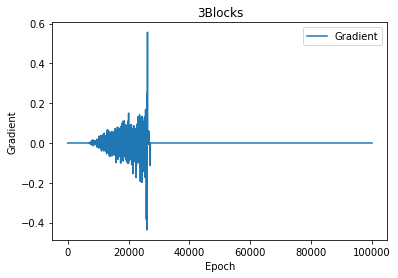

In [18]:
gradient_plot(gradient,subject)

(32, 3, 3, 3)
6 6


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(32, 32, 3, 3)
6 6
(64, 32, 3, 3)
6 11
(64, 64, 3, 3)
6 11
(128, 64, 3, 3)
6 22
(128, 128, 3, 3)
6 22


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet3. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


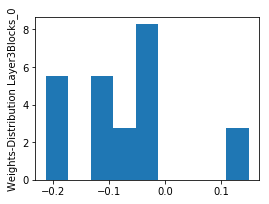

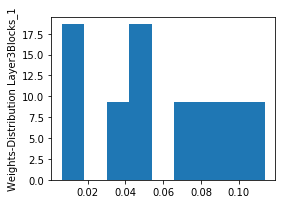

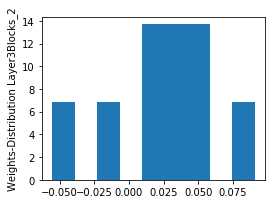

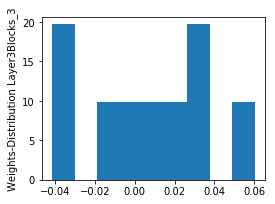

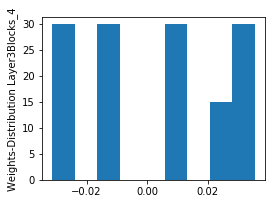

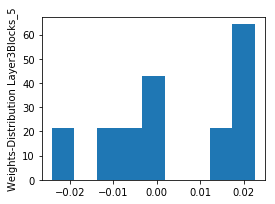

In [19]:
model_hist_maker(model_3,subject)
torch.save(model_3, "model_3.pth")


# MAXOUT IMPLEMENTATION FOR  MODEL2:

In [11]:
class ConvNet2_maxout(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2_maxout, self).__init__()
        self.layer1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0)           
        self.mx1 = Maxout.apply
        
#          self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=0)
        self.mx2 = Maxout.apply
#         self.pool2 = nn.MaxPool2d(kernel_size=3, stride=1)
        self.layer3 = nn.Conv2d(8,64,kernel_size=3, stride=1, padding=0)
        self.mx3 = Maxout.apply
        self.layer4 = nn.Conv2d(16,64,kernel_size=3, stride=1, padding=0)
        self.mx4 = Maxout.apply
#         self.layer5 = nn.Conv2d(16,128,kernel_size=3, stride=1, padding=0)
#         self.mx5= Maxout.apply
#         self.layer6 = nn.Conv2d(32,128,kernel_size=3, stride=1, padding=0)
#         self.mx6=Maxout.apply
        
        self.fc1 = nn.Linear(9216,500)
#         self.mx7 = Maxout.apply
        self.p = nn.PReLU()
        self.fc2 = nn.Linear(500, num_classes)
        self.soft = nn.Softmax()
    def forward(self,x):
        out = self.mx1(self.layer1(x))
        out = self.mx2(self.layer2(out))
        out = self.mx3(self.layer3(out))
        out = self.mx4(self.layer4(out))
#         out = self.mx5(self.layer5(out))
#         out = self.mx6(self.layer6(out))
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.p(out)
        out = self.fc2(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
#         out = out.reshape(out.size(0), -1)
#         out = self.fc1(out)
# #         print(out.size())
#         out = self.pre(out)
#         out = self.fc2(out)
#         out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    
    



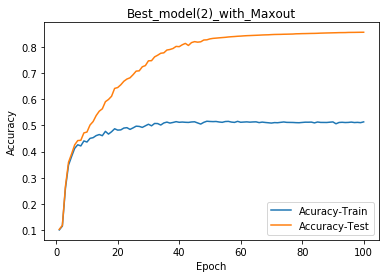

In [286]:
acc_plot(ep,acc_train,acc_test,subject)


In [16]:
num_classes=10
model_2_maxout = ConvNet2_maxout(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2_maxout)
subject = "BM(2)_withMaxout"
# loss_plot(ep,loss_train,loss_test,subject)

Starting............


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 'saved_variables' is deprecated; use 'saved_tensors'


Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302317
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.302376
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.302237
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.303287
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.302819
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.301998
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.302444
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.299837
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.299501
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.301106
Accuracy......

Training_set: Average loss: 0.0460, Accuracy: 5580/50000 (11%)

Accuracy......

Test_Set: Average loss: 0.0460, Accuracy: 1070/10000 (11%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.300890
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.304213
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.309310
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.300318
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.289105
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.285774
Train Epoch: 100 [30000/

Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.909041
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.997926
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.932195
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.897822
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.944813
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.979093
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.915051
Accuracy......

Training_set: Average loss: 0.0387, Accuracy: 26329/50000 (53%)

Accuracy......

Test_Set: Average loss: 0.0399, Accuracy: 4620/10000 (46%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.000878
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.961030
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.965023
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.967336
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.863433
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.971414
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.857855
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.886010
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.842655
Train Epoch: 100 

Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.794795
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.832401
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.795356
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.799854
Accuracy......

Training_set: Average loss: 0.0358, Accuracy: 33607/50000 (67%)

Accuracy......

Test_Set: Average loss: 0.0389, Accuracy: 5117/10000 (51%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.644020
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.842169
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.837194
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.731777
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.802739
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.840236
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.889201
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.893797
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.712652
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.717556
Accuracy......

Training_set: Average loss: 0.0354, Accuracy: 34659/50000 (69%)

Accuracy......

Test_Set: Average loss: 

Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.677817
Accuracy......

Training_set: Average loss: 0.0335, Accuracy: 39263/50000 (79%)

Accuracy......

Test_Set: Average loss: 0.0387, Accuracy: 5211/10000 (52%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.583643
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.682423
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.659905
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.562173
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.658358
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.645195
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.740112
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.692695
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.628276
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.664727
Accuracy......

Training_set: Average loss: 0.0335, Accuracy: 39361/50000 (79%)

Accuracy......

Test_Set: Average loss: 0.0388, Accuracy: 5175/10000 (52%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.684172
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.819324
Train Epoch: 100 [1000

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.639160
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.719300
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.639997
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.580140
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.704283
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.718327
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.662836
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.680310
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.582990
Accuracy......

Training_set: Average loss: 0.0327, Accuracy: 41408/50000 (83%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5263/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.682207
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.653307
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.681967
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.583044
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.718640
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.648537
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.625992
Train Epoch: 100 [

Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.620453
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.561018
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.620445
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.681130
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.578924
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.557876
Accuracy......

Training_set: Average loss: 0.0324, Accuracy: 41998/50000 (84%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5268/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.620348
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.599973
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.639448
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.637118
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.618368
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.521048
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.519719
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.639296
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.598888
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.600304
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.724380
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.599425
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.579288
Accuracy......

Training_set: Average loss: 0.0323, Accuracy: 42289/50000 (85%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5283/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.639579
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.697770
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.698929
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.599790
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.696451
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.620990
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.501208
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.617957
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.658430
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.620442
Accuracy......

Training_set: Average loss: 0.0322, Accuracy: 42312/50000 (85%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5297/10000 (53%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0322, Accuracy: 42530/50000 (85%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5311/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.577919
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.499621
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.580338
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.558454
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.617478
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.679737
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.599661
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.714675
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.578835
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.559989
Accuracy......

Training_set: Average loss: 0.0322, Accuracy: 42547/50000 (85%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5301/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.596999
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.540519
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.578893
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.596922
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.596991
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.540349
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.657713
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.560748
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.559819
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.581130
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.577994
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.618513
Accuracy......

Training_set: Average loss: 0.0321, Accuracy: 42683/50000 (85%)

Accuracy......

Test_Set: Average loss: 0.0386, Accuracy: 5295/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.677088
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.598167
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.637861
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.557420
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.636586
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.577235
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.559765
Train Epoch: 100 [

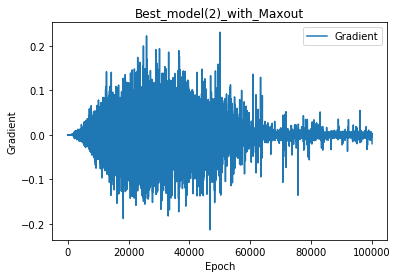

In [17]:
gradient_plot(gradient,subject)

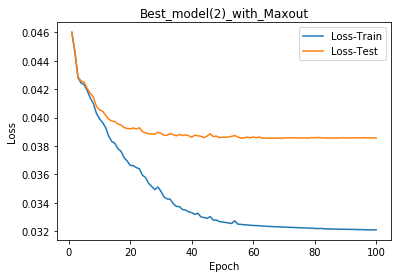

In [18]:
loss_plot(ep,loss_train,loss_test,subject)

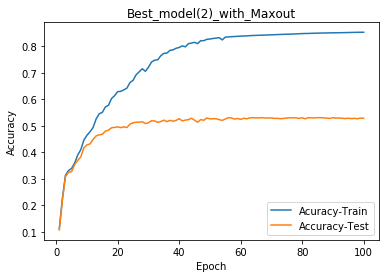

In [20]:
acc_plot(ep,acc_train,acc_test,subject)

[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1)), Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1)), Conv2d(8, 64, kernel_size=(3, 3), stride=(1, 1)), Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1)), Linear(in_features=9216, out_features=500, bias=True), PReLU(num_parameters=1), Linear(in_features=500, out_features=10, bias=True), Softmax()]
(32, 3, 3, 3)
6 6
(32, 8, 3, 3)
6 6
(64, 8, 3, 3)
6 11


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(64, 16, 3, 3)
6 11


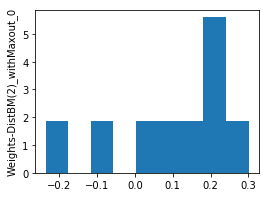

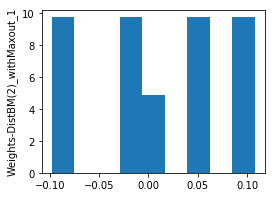

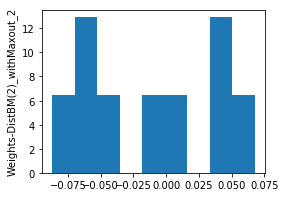

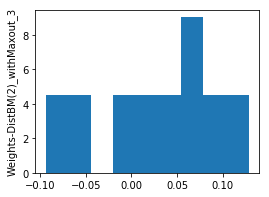

In [24]:
# model_hist_maker(model_2_maxout,subject)

subject = "BM(2)_withMaxout"
filters = model_2_maxout.modules
body_model = [i for i in model_2_maxout.children()]
print(body_model)
p = len(body_model)-4
for i in range(p):
        layer1 = body_model[i]
        tensor = layer1.weight.data.cpu().numpy()
        plot_kernels(tensor, subject+"_"+str(i))
# torch.save(model_, "model_3.pth")

# SELU IMPLEMENTATION OF MODEL2:

In [25]:
class ConvNet2_SELU(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2_SELU, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.SELU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.SELU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.SELU())
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                    nn.SELU())
        self.fc1 = nn.Linear(2304, 1000)
        self.pre = nn.SELU()
        self.fc2 = nn.Linear(1000, num_classes)
        self.pre2 = nn.SELU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [26]:
from torch.autograd import Variable
model_2_selu = ConvNet2_SELU(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2_selu)
# subject = "3 Blocks of Convolution"
# loss_plot(ep,loss_train,loss_test,subject)

Starting............


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 100 [0/50000 (0%)]	Loss: 2.299249
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.300277
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.290709
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.276196
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.257523
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.298014
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.196184
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.207208
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.211059
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.144512
Accuracy......

Training_set: Average loss: 0.0436, Accuracy: 14259/50000 (29%)

Accuracy......

Test_Set: Average loss: 0.0436, Accuracy: 2901/10000 (29%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.219471
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.211764
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.120095
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.231556
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.121529
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.172467
Train Epoch: 100 [30000

Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.814261
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.974202
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.894300
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.854154
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.911441
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.808608
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.959827
Accuracy......

Training_set: Average loss: 0.0374, Accuracy: 29703/50000 (59%)

Accuracy......

Test_Set: Average loss: 0.0381, Accuracy: 5547/10000 (55%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.918278
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.879041
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.869505
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.806747
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.891945
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.898743
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.856827
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.865252
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.793840
Train Epoch: 100 

Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.782997
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.731674
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.801209
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.726703
Accuracy......

Training_set: Average loss: 0.0360, Accuracy: 33149/50000 (66%)

Accuracy......

Test_Set: Average loss: 0.0371, Accuracy: 6005/10000 (60%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.709392
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.696875
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.824611
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.764960
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.725744
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.696265
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.902717
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.766502
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.685758
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.779047
Accuracy......

Training_set: Average loss: 0.0350, Accuracy: 35748/50000 (71%)

Accuracy......

Test_Set: Average loss: 

Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.706682
Accuracy......

Training_set: Average loss: 0.0340, Accuracy: 38275/50000 (77%)

Accuracy......

Test_Set: Average loss: 0.0361, Accuracy: 6534/10000 (65%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.692498
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.656321
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.764369
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.716890
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.699377
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.794356
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.610352
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.684102
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.678854
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.703022
Accuracy......

Training_set: Average loss: 0.0339, Accuracy: 38621/50000 (77%)

Accuracy......

Test_Set: Average loss: 0.0360, Accuracy: 6611/10000 (66%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.645754
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.668108
Train Epoch: 100 [1000

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.630847
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.603701
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.633128
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.685596
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.586545
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.703884
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.600612
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.606217
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.679562
Accuracy......

Training_set: Average loss: 0.0330, Accuracy: 40991/50000 (82%)

Accuracy......

Test_Set: Average loss: 0.0357, Accuracy: 6764/10000 (68%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.582147
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.656432
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.598783
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.583638
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.628248
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.566031
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.726349
Train Epoch: 100 [

Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.604692
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.648324
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.627500
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.559798
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.589174
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.643783
Accuracy......

Training_set: Average loss: 0.0324, Accuracy: 42204/50000 (84%)

Accuracy......

Test_Set: Average loss: 0.0356, Accuracy: 6818/10000 (68%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.601115
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.524217
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.603389
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.712852
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.688915
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.632487
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.590934
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.532284
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.642220
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.585856
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.608791
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.560799
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.543166
Accuracy......

Training_set: Average loss: 0.0321, Accuracy: 43003/50000 (86%)

Accuracy......

Test_Set: Average loss: 0.0355, Accuracy: 6853/10000 (69%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.665908
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.568868
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.562721
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.608947
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.641378
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.617907
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.620927
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.586526
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.668542
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.607958
Accuracy......

Training_set: Average loss: 0.0320, Accuracy: 43102/50000 (86%)

Accuracy......

Test_Set: Average loss: 0.0355, Accuracy: 6862/10000 (69%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0318, Accuracy: 43522/50000 (87%)

Accuracy......

Test_Set: Average loss: 0.0354, Accuracy: 6884/10000 (69%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.616771
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.625537
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.579442
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.572134
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.581312
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.619214
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.622167
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.675661
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.657807
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.662226
Accuracy......

Training_set: Average loss: 0.0318, Accuracy: 43562/50000 (87%)

Accuracy......

Test_Set: Average loss: 0.0354, Accuracy: 6892/10000 (69%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.521971
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.680536
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.563638
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.521130
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.561792
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.540258
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.541370
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.541104
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.640941
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.600026
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.582103
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.520181
Accuracy......

Training_set: Average loss: 0.0317, Accuracy: 43755/50000 (88%)

Accuracy......

Test_Set: Average loss: 0.0354, Accuracy: 6906/10000 (69%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.520924
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.638930
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.541489
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.542383
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.620647
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.698766
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.601555
Train Epoch: 100 [

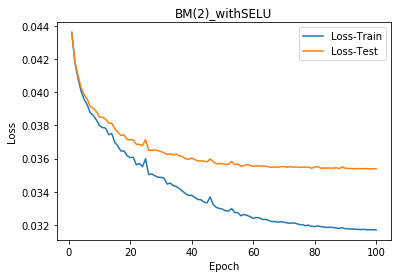

In [27]:
subject = "BM(2)_withSELU"
loss_plot(ep,loss_train,loss_test,subject)

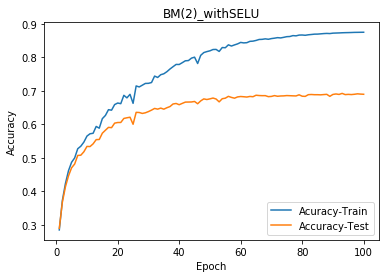

In [28]:
acc_plot(ep,acc_train,acc_test,subject)

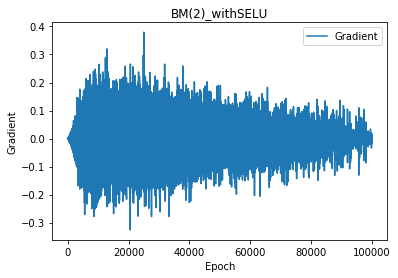

In [29]:
gradient_plot(gradient,subject)

[Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): SELU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): SELU()
  (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): SELU()
), Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): SELU()
), Linear(in_features=2304, out_features=1000, bias=True), SELU(), Linear(in_features=1000, out_features=10, bias=True), SELU(), Softmax()]
(32, 3, 3, 3)
6 6
(32, 32, 3, 3)
6 6
(64, 32, 3, 3)
6 11


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(64, 64, 3, 3)
6 11


TypeError: 'Linear' object does not support indexing

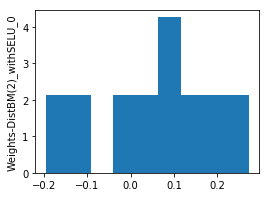

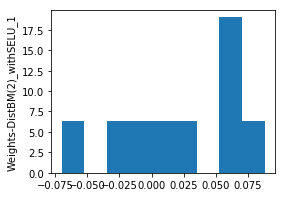

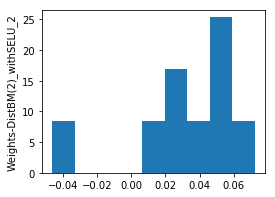

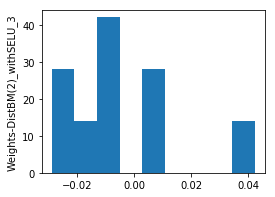

In [30]:
filters = model_2_selu.modules
body_model = [i for i in model_2_selu.children()]
print(body_model)
p = len(body_model)-4
for i in range(p):
        layer1 = body_model[i][0]
        tensor = layer1.weight.data.cpu().numpy()
        plot_kernels(tensor, subject+"_"+str(i))

# ELU implementation with model2

In [31]:
class ConvNet2_ELU(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2_ELU, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.ELU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.ELU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.ELU())
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                    nn.ELU())
        self.fc1 = nn.Linear(2304, 1000)
        self.pre = nn.ELU()
        self.fc2 = nn.Linear(1000, num_classes)
        self.pre2 = nn.ELU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [32]:
model_2_elu = ConvNet2_ELU(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2_elu)

Starting............
Train Epoch: 100 [0/50000 (0%)]	Loss: 2.302963


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.301922
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.303076
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.302398
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.301564
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302161
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.301614
Train Epoch: 100 [35000/50000 (70%)]	Loss: 2.302173
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.301236
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.302596
Accuracy......

Training_set: Average loss: 0.0460, Accuracy: 5157/50000 (10%)

Accuracy......

Test_Set: Average loss: 0.0460, Accuracy: 1011/10000 (10%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.301656
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.300928
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.300323
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.300970
Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.301780
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.302391
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.302485
Train Epoch: 100 [3

Train Epoch: 100 [20000/50000 (40%)]	Loss: 2.007090
Train Epoch: 100 [25000/50000 (50%)]	Loss: 2.011989
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.967753
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.937801
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.043346
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.048811
Accuracy......

Training_set: Average loss: 0.0399, Accuracy: 23462/50000 (47%)

Accuracy......

Test_Set: Average loss: 0.0401, Accuracy: 4566/10000 (46%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 2.097678
Train Epoch: 100 [5000/50000 (10%)]	Loss: 2.081043
Train Epoch: 100 [10000/50000 (20%)]	Loss: 2.126150
Train Epoch: 100 [15000/50000 (30%)]	Loss: 2.036167
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.926547
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.999847
Train Epoch: 100 [30000/50000 (60%)]	Loss: 2.004173
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.970809
Train Epoch: 100 [40000/50000 (80%)]	Loss: 2.028662
Train Epoch: 100 [45000/50000 (90%)]	Loss: 2.047164
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.942945
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.840493
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.895853
Accuracy......

Training_set: Average loss: 0.0379, Accuracy: 28481/50000 (57%)

Accuracy......

Test_Set: Average loss: 0.0385, Accuracy: 5312/10000 (53%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.884370
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.867168
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.857096
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.961670
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.967681
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.862202
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.831720
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.886445
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.828684
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.739414
Accuracy......

Training_set: Average loss: 0.0378, Accuracy: 28610/50000 (57%)

Accuracy......

Test_Set: Average loss: 0.0385, Accuracy: 5351/10000 (54%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0368, Accuracy: 31261/50000 (63%)

Accuracy......

Test_Set: Average loss: 0.0379, Accuracy: 5656/10000 (57%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.876494
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.768107
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.859664
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.830398
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.844794
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.825330
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.790417
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.852186
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.784224
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.763147
Accuracy......

Training_set: Average loss: 0.0368, Accuracy: 31221/50000 (62%)

Accuracy......

Test_Set: Average loss: 0.0379, Accuracy: 5642/10000 (56%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.846211
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.962983
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.840890
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.837092
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.794744
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.782793
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.787757
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.908015
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.810842
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.823246
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.904560
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.851039
Accuracy......

Training_set: Average loss: 0.0358, Accuracy: 33609/50000 (67%)

Accuracy......

Test_Set: Average loss: 0.0375, Accuracy: 5823/10000 (58%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.728870
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.785367
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.717150
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.781225
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.703130
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.766083
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.758084
Train Epoch: 100 [

Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.747195
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.818805
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.812099
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.825444
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.801484
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.678752
Accuracy......

Training_set: Average loss: 0.0349, Accuracy: 36150/50000 (72%)

Accuracy......

Test_Set: Average loss: 0.0371, Accuracy: 6040/10000 (60%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.749818
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.698030
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.741221
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.681036
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.663562
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.740407
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.685384
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.562439
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.728309
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.716868
Accuracy......

T

Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.645561
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.667700
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.825744
Accuracy......

Training_set: Average loss: 0.0334, Accuracy: 39809/50000 (80%)

Accuracy......

Test_Set: Average loss: 0.0364, Accuracy: 6359/10000 (64%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.688127
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.637695
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.668327
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.631121
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.654130
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.773134
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.668782
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.694364
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.725767
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.650809
Accuracy......

Training_set: Average loss: 0.0334, Accuracy: 39662/50000 (79%)

Accuracy......

Test_Set: Average loss: 0.0365, Accuracy: 6345/10000 (63%)

Train Epoch: 100

Accuracy......

Training_set: Average loss: 0.0330, Accuracy: 40724/50000 (81%)

Accuracy......

Test_Set: Average loss: 0.0363, Accuracy: 6415/10000 (64%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.680256
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.546701
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.693078
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.685191
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.752545
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.677706
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.687734
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.707074
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.669267
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.630297
Accuracy......

Training_set: Average loss: 0.0327, Accuracy: 41492/50000 (83%)

Accuracy......

Test_Set: Average loss: 0.0363, Accuracy: 6439/10000 (64%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.605604
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.657973
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.620054
Train Epoch: 100 [1500

Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.536775
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.623504
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.622755
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.619768
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.640646
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.660958
Train Epoch: 100 [35000/50000 (70%)]	Loss: 1.628203
Train Epoch: 100 [40000/50000 (80%)]	Loss: 1.541618
Train Epoch: 100 [45000/50000 (90%)]	Loss: 1.663667
Accuracy......

Training_set: Average loss: 0.0326, Accuracy: 41581/50000 (83%)

Accuracy......

Test_Set: Average loss: 0.0364, Accuracy: 6377/10000 (64%)

Train Epoch: 100 [0/50000 (0%)]	Loss: 1.626408
Train Epoch: 100 [5000/50000 (10%)]	Loss: 1.541670
Train Epoch: 100 [10000/50000 (20%)]	Loss: 1.600611
Train Epoch: 100 [15000/50000 (30%)]	Loss: 1.647976
Train Epoch: 100 [20000/50000 (40%)]	Loss: 1.604746
Train Epoch: 100 [25000/50000 (50%)]	Loss: 1.602310
Train Epoch: 100 [30000/50000 (60%)]	Loss: 1.620847
Train Epoch: 100 [

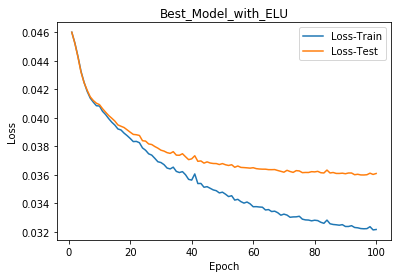

In [25]:
subject = "BM(2)_withELU"
loss_plot(ep,loss_train,loss_test,subject)

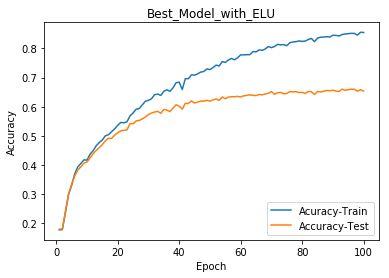

In [26]:
acc_plot(ep,acc_train,acc_test,subject)

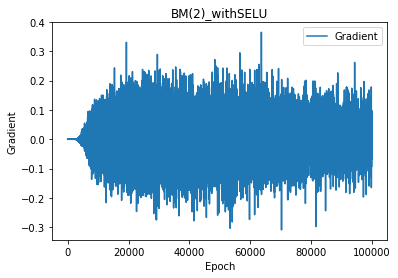

In [33]:
gradient_plot(gradient,subject)

[Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ELU(alpha=1.0)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ELU(alpha=1.0)
  (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): ELU(alpha=1.0)
), Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): ELU(alpha=1.0)
), Linear(in_features=2304, out_features=1000, bias=True), ELU(alpha=1.0), Linear(in_features=1000, out_features=10, bias=True), ELU(alpha=1.0), Softmax()]
(32, 3, 3, 3)
6 6
(32, 32, 3, 3)
6 6
(64, 32, 3, 3)
6 11
(64, 64, 3, 3)
6 11


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


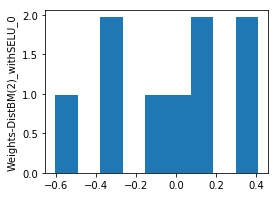

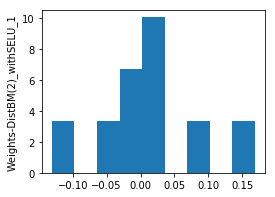

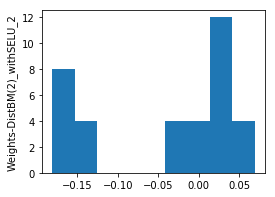

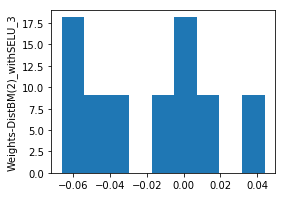

In [34]:
filters = model_2_elu.modules
body_model = [i for i in model_2_elu.children()]
print(body_model)
p = len(body_model)-5
for i in range(p):
        layer1 = body_model[i][0]
        tensor = layer1.weight.data.cpu().numpy()
        plot_kernels(tensor, subject+"_"+str(i))

In [31]:
torch.save(model_2_selu, "Best_model_with_SELU.pth")
torch.save(model_2_elu, "Best_model_with_ELU.pth")

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet2_SELU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet2_ELU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [33]:
class GELU(nn.Module):
    def __init__(self, fast=True):
        super(GELU, self).__init__()
        self.fast = fast

    def forward(self, input):
        if self.fast:
            return x * torch.sigmoid(1.702 * x)
        else:
            return 0.5 * x * (1 + torch.tanh(x * 0.7978845608 * (1 + 0.044715 * x * x)))

In [ ]:
# num_classes=10
# model = ConvNet2_SELU(num_classes).cuda()
# # model.apply(weight_init)
# print(model)
# # exam = torch.FloatTensor(Train_data_t[0,:,:,:])
# # exam = exam.unsqueeze(0)

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# # learning_rate = 0.1
# # criterion = nn.CrossEntropyLoss()
# # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# # num_epochs=100
# from torch.autograd import Variable
# total_step =len(Train_data_t)
# exam = exam.to(device)
# exam = torch.transpose(exam,2,0,1)
# outputs = model(exam)

# GELU IMPLEMENTATION WITH BEST MODEL

In [ ]:
g1=GELU()
g2=GELU()
g3=GELU()
g4=GELU()
g5 = GELU()
g6=GELU()
class ConvNet2_GELU(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2_GELU, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    GELU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    GELU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        GELU())
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        GELU())
        self.fc1 = nn.Linear(2304, 1000)
        self.pre = GELU()
        self.fc2 = nn.Linear(1000, num_classes)
        self.pre2 = GELU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [ ]:
model_2_gelu = ConvNet2_GELU(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2_gelu)

In [35]:
learning_rate = 0.03

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs=100
from torch.autograd import Variable
total_step =len(Train_data_t)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

NameError: name 'model' is not defined

In [ ]:
loss_train=[]
acc_train=[]
loss_test=[]
acc_test=[]
ep=[]
gradient=[]
for epoch in range(1,num_epochs+1):
    ep.append(epoch)
    train(model, device, train_loader, optimizer, num_epochs,gradient)
    test(model, device, train_loader, "Training_set",loss_train, acc_train)
    test(model, device, test_loader, "Test_Set",loss_test,acc_test)

In [ ]:
import matplotlib.pyplot as plt
def loss_plot(ep, loss_train, loss_test, subject):
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(subject)
    plt.plot(ep,loss_train)
    plt.plot(ep,loss_test)
    plt.legend(["Loss-Train", "Loss-Test"], loc='upper right')
    plt.savefig(subject+".png")


In [ ]:
# import matplotlib.pyplot as plt
# loss_plot(ep,loss_train,loss_test, "With 3 Blocks of Convolution")
def acc_plot(ep, acc_test,acc_train,subject):
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(subject)
    plt.plot(ep,acc_train)
    plt.plot(ep,acc_test)
    plt.legend(["Acuracy-Train", "Accuracy-Test"], loc='lower right')
    plt.savefig(subject+".png")



In [ ]:
acc_plot(ep,acc_train,acc_test, "With 3 Blocks of Convolution")
interpolate_grad =[gradient[i] for i in range(100000) if i%1000==0]
es = [i for i in range(100000)]
print(len(interpolate_grad))
plt.xlabel("Epoch")
plt.ylabel("Gradient")
plt.title("With Single Conv Block CNN")
plt.plot(es,gradient)
# plt.plot(ep,acc_test)
plt.legend(["Gradient"], loc='upper right')

In [ ]:
interpolate_grad =[gradient[i] for i in range(100000) if i%1000==0]
es = [i for i in range(100000)]
print(len(interpolate_grad))
plt.xlabel("Epoch")
plt.ylabel("Gradient")
plt.title("With Single Conv Block CNN")
plt.plot(es,gradient)
# plt.plot(ep,acc_test)
plt.legend(["Gradient"], loc='upper right')

In [ ]:
def plot_kernels(tensor, num_cols=6):
    print (tensor.shape)
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    print(num_cols,num_rows)
    fig = plt.figure(figsize=(num_cols,num_rows))
#     for i in range(tensor.shape[0]):
#         ax1 = fig.add_subplot(num_rows,num_cols,i+1)
#         ax1.imshow(tensor[i][1])
#         ax1.axis('off')
#         ax1.set_xticklabels([])
#         ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
  

filters = model.modules
body_model = [i for i in model.children()]
print(body_model)
layer1 = body_model[1][0]
tensor = layer1.weight.data.cpu().numpy()
# print(type(tensor))
plot_kernels(tensor)

# MAXOUT ACTIVATION ON ALL 3  TYPES OF CNN:


In [13]:
import torch.nn as nn
from torch.autograd import Function
class Maxout(Function):

    # Note that both forward and backward are @staticmethods
    @staticmethod
    # bias is an optional argument
    def forward(ctx, input):
        x = input
        max_out=4    #Maxout Parameter
        kernels = x.shape[1]  # to get how many kernels/output
        feature_maps = int(kernels / max_out)
        out_shape = (x.shape[0], feature_maps, max_out, x.shape[2], x.shape[3])
        x= x.view(out_shape)
        y, indices = torch.max(x[:, :, :], 2)
        ctx.save_for_backward(input)
        ctx.indices=indices
        ctx.max_out=max_out
        return y

    # This function has only a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx, grad_output):
        input1,indices,max_out= ctx.saved_variables[0],Variable(ctx.indices),ctx.max_out
        input=input1.clone()
        for i in range(max_out):
            a0=indices==i
            input[:,i:input.data.shape[1]:max_out]=a0.float()*grad_output
      

        return input
    
# code reffered from https://github.com/Usama113/Maxout-PyTorch/blob/master/Maxout.ipynb

In [ ]:
class ConvNet3_maxout(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet3_maxout, self).__init__()
        self.layer1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0)           
        self.mx1 = Maxout.apply
#          self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=0)
        self.mx2 = Maxout.apply
#         self.pool2 = nn.MaxPool2d(kernel_size=3, stride=1)
        self.layer3 = nn.Conv2d(8,64,kernel_size=3, stride=1, padding=0)
        self.mx3 = Maxout.apply
        self.layer4 = nn.Conv2d(16,64,kernel_size=3, stride=1, padding=0)
        self.mx4 = Maxout.apply
        self.layer5 = nn.Conv2d(16,128,kernel_size=3, stride=1, padding=0)
        self.mx5= Maxout.apply
        self.layer6 = nn.Conv2d(32,128,kernel_size=3, stride=1, padding=0)
        self.mx6=Maxout.apply
        
        self.fc1 = nn.Linear(12800,500)
#         self.mx7 = Maxout.apply
        self.p = nn.PReLU()
        self.fc2 = nn.Linear(500, num_classes)
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.mx1(self.layer1(x))
        out = self.mx2(self.layer2(out))
        out = self.mx3(self.layer3(out))
        out = self.mx4(self.layer4(out))
        out = self.mx5(self.layer5(out))
        out = self.mx6(self.layer6(out))
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.p(out)
        out = self.fc2(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
#         out = out.reshape(out.size(0), -1)
#         out = self.fc1(out)
# #         print(out.size())
#         out = self.pre(out)
#         out = self.fc2(out)
#         out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [ ]:
num_classes=10
model_maxout = ConvNet3_maxout(num_classes).cuda()
# model.apply(weight_init)
print(model_maxout)
# exam = torch.FloatTensor(Train_data_t[0,:,:,:])
# exam = exam.unsqueeze(0)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [ ]:
learning_rate = 0.03

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_maxout.parameters(), lr=learning_rate)
num_epochs=100
from torch.autograd import Variable
total_step =len(Train_data_t)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss_train=[]
acc_train=[]
loss_test=[]
acc_test=[]
ep=[]
gradient=[]

def model_activate(m):
    print("Starting............")
    for epoch in range(1,num_epochs+1):
        ep.append(epoch)
        train(m, device, train_loader, optimizer, num_epochs,gradient)
        test(m, device, train_loader, "Training_set",loss_train, acc_train)
        test(m, device, test_loader, "Test_Set",loss_test,acc_test)


In [ ]:
model_activate(model_maxout)

In [ ]:
loss_plot(ep,loss_train,loss_test, "With 3 Blocks of Convolution and Maxout")

In [ ]:
acc_plot(ep,acc_train,acc_test,"With 3 Blocks of Convolution and Maxout")

In [ ]:
def plot_kernels(tensor, name,num_cols=6):
    print (tensor.shape)
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    print(num_cols,num_rows)
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        p = tensor[i,0]
        p = p.flatten()
#         axes = plt.gca()
#         axes.set_xlim([0,2])
#         axes.set_ylim([0,1])
        fig = plt.gcf()
        fig.set_size_inches(4, 3)
#         fig.savefig('test2png.png', dpi=10, forward=True)
        plt.hist(p, normed=True, bins=9)
        plt.ylabel("Weights-Distribution Layer"+name)
#         plt.figure(figsize=(1,1),dpi=1, facecolor='w', edgecolor='k')
#         plt.ylim((0,4)) 
        plt.savefig("hist_layer"+name+".png")
        break
#         ax1 = fig.add_subplot(num_rows,num_cols,i+1)
#         ax1.imshow(tensor[i][1])
#         ax1.axis('off')
#         ax1.set_xticklabels([])
#         ax1.set_yticklabels([])

    
    
  

def model_hist_maker(model_name,r)
    filters = model_name.modules
    body_model = [i for i in model_name.children()]
#     print(body_model)
    for i in range(r):
        layer1 = body_model[i]
        tensor = layer1.weight.data.cpu().numpy()
        plot_kernels(tensor, str(i))


# print(type(tensor))


In [ ]:
torch.save(model_maxout, "Model_3Blocks_maxout.pth")
def gradient_plot(gradient,name):
    plt.xlabel("Epoch")
    es = [i for i in range(100000)]
    plt.ylabel("Gradient")
    plt.title(name)
    plt.plot(es,gradient)
    # plt.plot(ep,acc_test)
    plt.legend(["Gradient"], loc='upper right')
gradient_plot(gradient,"3 Block Network Maxout-Gradient")

In [99]:
class ConvNet2_Rms(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet2_Rms, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.SELU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.SELU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.SELU()
                    )
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        nn.SELU())
        
        self.fc1 = nn.Linear(2304, 1000)
        self.pre = nn.SELU()
        self.fc2 = nn.Linear(1000, num_classes)
        self.pre2 = nn.SELU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out 

In [108]:
def model_activate(m):
    learning_rate = 0.01
    loss_train=[]
    acc_train=[]
    loss_test=[]
    acc_test=[]
    ep=[]
    gradient=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adadelta(m.parameters(), lr=learning_rate)
    num_epochs=10
    from torch.autograd import Variable
    total_step =len(Train_data_t)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print("Starting............")
    for epoch in range(1,num_epochs+1):
        ep.append(epoch)
        train(m, device, train_loader, optimizer, num_epochs,gradient)
        test(m, device, train_loader, "Training_set",loss_train, acc_train)
        test(m, device, test_loader, "Test_Set",loss_test,acc_test)
    return loss_train,loss_test,acc_test,acc_train,ep,gradient



In [109]:
model_2_rms = ConvNet2_Rms(num_classes=10).cuda()
loss_train,loss_test,acc_test,acc_train,ep,gradient = model_activate(model_2_rms)

Starting............


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 10 [0/50000 (0%)]	Loss: 2.302697
Train Epoch: 10 [5000/50000 (10%)]	Loss: 2.299036
Train Epoch: 10 [10000/50000 (20%)]	Loss: 2.292618
Train Epoch: 10 [15000/50000 (30%)]	Loss: 2.277562
Train Epoch: 10 [20000/50000 (40%)]	Loss: 2.260148
Train Epoch: 10 [25000/50000 (50%)]	Loss: 2.259622
Train Epoch: 10 [30000/50000 (60%)]	Loss: 2.252467
Train Epoch: 10 [35000/50000 (70%)]	Loss: 2.219231
Train Epoch: 10 [40000/50000 (80%)]	Loss: 2.243700
Train Epoch: 10 [45000/50000 (90%)]	Loss: 2.174887
Accuracy......

Training_set: Average loss: 0.0436, Accuracy: 14504/50000 (29%)

Accuracy......

Test_Set: Average loss: 0.0436, Accuracy: 2930/10000 (29%)

Train Epoch: 10 [0/50000 (0%)]	Loss: 2.150132
Train Epoch: 10 [5000/50000 (10%)]	Loss: 2.099893
Train Epoch: 10 [10000/50000 (20%)]	Loss: 2.186183
Train Epoch: 10 [15000/50000 (30%)]	Loss: 2.122370
Train Epoch: 10 [20000/50000 (40%)]	Loss: 2.141375
Train Epoch: 10 [25000/50000 (50%)]	Loss: 2.129259
Train Epoch: 10 [30000/50000 (60%)]	Los

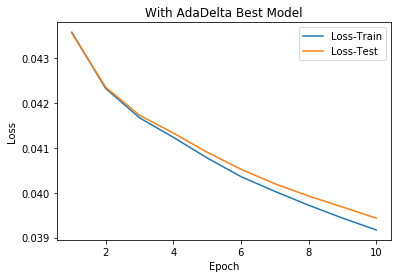

In [112]:
loss_plot(ep,loss_train,loss_test, "With AdaDelta Best Model")
# acc_plot(ep,acc_train,acc_test,"With 3 Blocks of Convolution and SELU")
# gradient_plot(gradient,"With 3 Blocks of Convolution and SELU")

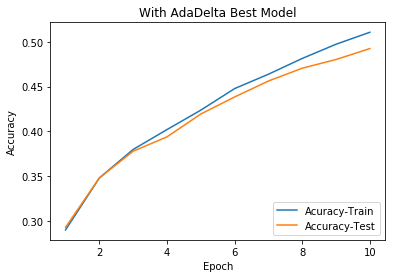

In [113]:
acc_plot(ep,acc_train,acc_test, "With AdaDelta Best Model")

In [ ]:
# loss = Variable(torch.cuda.FloatTensor([0]))
# los =[]
# epoch=[]
# for epoch in range(num_epochs):
    
#     for i, (images,labels) in enumerate(train_loader):
#         images = images.type(torch.FloatTensor)
        
# #             images = torch.FloatTensor(images)
#         images = images.to(device)
#         labels = labels.to(device)
# #             print(Train_labels_t[i])
# #             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
#         # Forward pass
# #             print(images.size())
# #             images = images.unsqueeze(0)
#         optimizer.zero_grad()
#         outputs = model(images)
# #             print(outputs,"        ",labels)
#         loss = criterion(outputs, labels)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         los.append(loss.data[0])
            
# #             print (loss.data[0])
# #             lo.append(loss_contrastive.data[0])
            
# #             loss_contrastive += Variable(torch.FloatTensor([0]))
# #             loss_contrastive.backward(retain_graph=True)
            
# #         optimizer.step()
# #         loss = Variable(torch.cuda.FloatTensor([0]))
# #         else:
# #             images = torch.FloatTensor(images)
# #             images = images.to(device)
# # #             print(Train_labels_t[i])
# #             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
# #             # Forward pass
# # #             print(images.size())
# #             images = images.unsqueeze(0)
# #             outputs = model(images)
# # #             print(outputs,"        ",labels)
# #             loss += criterion(outputs, labels)
            
#         if (i+1) % 100 == 0:
#             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [ ]:
# import pickle as pkl
# pkl.dump(los, open("los_1.pkl","wb"))
# torch.save(model, "model_1.pth")



In [ ]:
# torch.load("model_1.pth")
# print(len(los))
# new_l=[]
# for i,l in enumerate(los):
#     if i%1000==0:
#         new_l.append(l)

# epoch = [i for i in range(100)]

In [ ]:
# import matplotlib.pyplot as plt
# plt.xlabel("Iteration")
# plt.ylabel("Loss")
# plt.plot(epoch,new_l)